# E-Commerce Price & Product Prediction


# Business Understanding

## Project Context
New sellers joining e-commerce platforms like Jumia face a critical challenge: identifying the **right products** to sell and setting the **optimum price** that balances competitiveness with profitability. Without reliable insights, sellers risk overpricing (leading to low sales) or underpricing (reducing margins).  

This project leverages historical marketplace data scraped from Jumia (1,999 records, 13 features) to build a predictive model that provides **product and price recommendations** for new sellers in the electronics category.  

By focusing on **pricing trends, discounts, customer ratings, and category demand**, the model will support **B2B lead generation**, helping the marketplace attract and retain more sellers.

---

## Problem Statement
From the dataset, we observe key challenges:
- **Price variability:** Prices (e.g., “KSh 499” vs “KSh 8,900”) vary widely across similar categories.  
- **Discount influence:** Discounts (up to 60%+) strongly affect buying decisions, but optimal discount ranges are unclear.  
- **Category saturation:** Popular categories like *Phones & Tablets* and *Home & Office* are highly competitive.  
- **Seller differentiation:** Some sellers attract better ratings at similar price ranges, showing that non-price factors also matter.  

Sellers need **data-driven insights** on how to enter this competitive environment.

---

## Business Objectives
1. **Lead Generation for B2B Sellers**  
   Use predictive insights to guide new sellers on which electronic products to introduce.  

2. **Price Optimization**  
   Recommend competitive price points by analyzing `current_price`, `original_price`, and `discount`.  

3. **Product Recommendation**  
   Suggest trending product categories (e.g., *Phones & Tablets*, *Home & Office electronics*).  

4. **Trust & Ratings Insights**  
   Leverage `verified_ratings` and `rating_number` to highlight what makes products successful.  

---

## Stakeholders
- **New Sellers (B2B Clients):**  
  Need reliable recommendations on product selection and pricing to gain market entry.  

- **Marketplace (e.g., Jumia):**  
  Gains from attracting more sellers, expanding inventory, and increasing customer satisfaction.  

- **Business Development Teams:**  
  Use predictive reports as a selling point when onboarding new vendors.  

- **Data Science Team:**  
  Responsible for model development and insights reporting.  

- **End Customers (Indirect Stakeholders):**  
  Benefit from fairer prices and better product variety.  

---

## Dataset Description
The dataset contains **scraped product listings** with the following key features:  
- `current_price` → Current listed product price.  
- `original_price` & `discount` → Discount strategy and price reductions.  
- `main_category` → Product category (electronics, fashion, etc.).  
- `rating_number` & `verified_ratings` → Customer satisfaction indicators.  
- `seller` → Seller identity and credibility.  
- `title` → Product details for text-based analysis.  

Our analysis will focus primarily on **electronic categories** such as *Phones & Tablets* and *Home & Office electronics*.  

---

## Deliverables
- Predictive model for **optimum price recommendations**.  
- Insights on **which electronic products are most promising** for new sellers.  
- A business-friendly report/dashboard summarizing:  
  - Price ranges by category.  
  - Discount impact on sales potential.  
  - Rating influence on product success.  

---

## Success Criteria
- **Quantitative:**  
  - Increase in the number of sellers joining the platform.  
  - Improved sales conversion rates in electronics categories.  
  - Demonstrable accuracy of predicted price ranges vs. market prices.  

- **Qualitative:**  
  - New sellers report confidence in entering the market.  
  - Marketplace managers adopt insights into onboarding strategy.  


In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

### Reading data into a dataframe named df, a copy is made later and saved as data. We will work on dataframe data leaving df untouched.

In [2]:
#Read the data and save it in a dataframe called df
df = pd.read_csv("./Data/New_Price_Change_Monitoring_System.csv")

#read the first 5 rows
df.head()

,date_scraped,page_number,product_url,image,current_price,title,brand,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 499,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,NaN,"KSh 1,399",64%,(3867 verified ratings),4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 719,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",NaN,"KSh 1,200",40%,(557 verified ratings),3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets
2,2025-09-14,1,https://www.jumia.co.ke/samsung-galaxy-a05-6.7...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,"KSh 8,900","Samsung Galaxy A05, 6.7"", 64GB + 4GB RAM (Dual...",NaN,"KSh 13,187",33%,(523 verified ratings),4.1,LOFFEL ELECTRONICS LIMITED - AC,Phones & Tablets
3,2025-09-14,1,https://www.jumia.co.ke/ailyons-afk-111-water-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,"KSh 2,599",AILYONS AFK-111 Water Dispenser Hot And Normal...,NaN,"KSh 4,999",48%,(2092 verified ratings),3.9,UR-HOME(KENYA),Home & Office
4,2025-09-14,1,https://www.jumia.co.ke/fashion-couple-canvas-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 699 - KSh 729,Couple Canvas Low Top Lace-up Shoes Classic Ca...,NaN,"KSh 1,200 - KSh 1,500",53%,(734 verified ratings),4.2,Waanzilish,Fashion


In [3]:
#Make a copy and save it as data. we will work on data, and leave df as the original untouched dataframe.
data=df.copy()
data.head()

,date_scraped,page_number,product_url,image,current_price,title,brand,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 499,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,NaN,"KSh 1,399",64%,(3867 verified ratings),4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 719,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",NaN,"KSh 1,200",40%,(557 verified ratings),3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets
2,2025-09-14,1,https://www.jumia.co.ke/samsung-galaxy-a05-6.7...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,"KSh 8,900","Samsung Galaxy A05, 6.7"", 64GB + 4GB RAM (Dual...",NaN,"KSh 13,187",33%,(523 verified ratings),4.1,LOFFEL ELECTRONICS LIMITED - AC,Phones & Tablets
3,2025-09-14,1,https://www.jumia.co.ke/ailyons-afk-111-water-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,"KSh 2,599",AILYONS AFK-111 Water Dispenser Hot And Normal...,NaN,"KSh 4,999",48%,(2092 verified ratings),3.9,UR-HOME(KENYA),Home & Office
4,2025-09-14,1,https://www.jumia.co.ke/fashion-couple-canvas-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,KSh 699 - KSh 729,Couple Canvas Low Top Lace-up Shoes Classic Ca...,NaN,"KSh 1,200 - KSh 1,500",53%,(734 verified ratings),4.2,Waanzilish,Fashion


In [4]:
#check the number of rows and columns
data.shape

(1999, 13)

In [5]:
#Check for missing values, datatypes.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_scraped      1999 non-null   object 
 1   page_number       1999 non-null   int64  
 2   product_url       1999 non-null   object 
 3   image             1999 non-null   object 
 4   current_price     1999 non-null   object 
 5   title             1999 non-null   object 
 6   brand             0 non-null      float64
 7   original_price    1798 non-null   object 
 8   discount          1798 non-null   object 
 9   verified_ratings  1549 non-null   object 
 10  rating_number     1999 non-null   float64
 11  seller            1999 non-null   object 
 12  main_category     1999 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 203.1+ KB


In [6]:
#Drop brand since the column is empty
data = data.drop(columns=['brand'], errors='ignore')
data.shape

(1999, 12)

### Data Cleaning

In [7]:
# 2. Clean current_price & original_price. make them numeric
def clean_price(x):
    if pd.isna(x):
        return np.nan
    x = str(x).replace("KSh", "").replace(",", "").strip()
    if "-" in x:  # handle ranges like "699 - 729" It will take the average of the two
        parts = x.split("-")
        nums = [float(p.strip()) for p in parts if p.strip().replace('.', '', 1).isdigit()]
        return np.mean(nums) if nums else np.nan
    return float(x) if x.replace('.', '', 1).isdigit() else np.nan

data['current_price'] = data['current_price'].apply(clean_price)
data['original_price'] = data['original_price'].apply(clean_price)
data.head()

,date_scraped,page_number,product_url,image,current_price,title,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,499.0,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,1399.0,64%,(3867 verified ratings),4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,719.0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",1200.0,40%,(557 verified ratings),3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets
2,2025-09-14,1,https://www.jumia.co.ke/samsung-galaxy-a05-6.7...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,8900.0,"Samsung Galaxy A05, 6.7"", 64GB + 4GB RAM (Dual...",13187.0,33%,(523 verified ratings),4.1,LOFFEL ELECTRONICS LIMITED - AC,Phones & Tablets
3,2025-09-14,1,https://www.jumia.co.ke/ailyons-afk-111-water-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,2599.0,AILYONS AFK-111 Water Dispenser Hot And Normal...,4999.0,48%,(2092 verified ratings),3.9,UR-HOME(KENYA),Home & Office
4,2025-09-14,1,https://www.jumia.co.ke/fashion-couple-canvas-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,714.0,Couple Canvas Low Top Lace-up Shoes Classic Ca...,1350.0,53%,(734 verified ratings),4.2,Waanzilish,Fashion


In [8]:
#Clean discount, remove %
data['discount'] = data['discount'].str.replace('%', '', regex=False)
data.head(2)

,date_scraped,page_number,product_url,image,current_price,title,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,499.0,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,1399.0,64,(3867 verified ratings),4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,719.0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",1200.0,40,(557 verified ratings),3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets


In [9]:
#Clean verified_ratings. Extract numeric value from the sring.
data['verified_ratings'] = (
    data['verified_ratings']
    .str.extract(r'(\d+)')
    .astype(float)
)
data.head(2)

,date_scraped,page_number,product_url,image,current_price,title,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,499.0,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,1399.0,64,3867.0,4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,719.0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",1200.0,40,557.0,3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets


### Handling Missing Values

In [10]:
#Recheck missing values
data.isna().sum()

date_scraped          0
page_number           0
product_url           0
image                 0
current_price         0
title                 0
original_price      201
discount            201
verified_ratings    488
rating_number         0
seller                0
main_category         0
dtype: int64

In [11]:
# For original_price, the missing value is set equal to current_price (assume no discount)
data['original_price'] = data['original_price'].fillna(data['current_price'])
data.isna().sum()

date_scraped          0
page_number           0
product_url           0
image                 0
current_price         0
title                 0
original_price        0
discount            201
verified_ratings    488
rating_number         0
seller                0
main_category         0
dtype: int64

In [12]:
# Discount, we filled missing values with 0
data['discount'] = data['discount'].fillna(0)
data.isna().sum()

date_scraped          0
page_number           0
product_url           0
image                 0
current_price         0
title                 0
original_price        0
discount              0
verified_ratings    488
rating_number         0
seller                0
main_category         0
dtype: int64

In [13]:
# verified_ratings, missing = 0
data['verified_ratings'] = data['verified_ratings'].fillna(0)
data.isna().sum()

date_scraped        0
page_number         0
product_url         0
image               0
current_price       0
title               0
original_price      0
discount            0
verified_ratings    0
rating_number       0
seller              0
main_category       0
dtype: int64

### Handling Duplicates in column product_url

In [14]:
# Count duplicates based on product_url
if 'product_url' in data.columns:
    print(data.duplicated(subset=['product_url']).sum()) # marks the first occurrence as False and only marks subsequent repeats as True

94


In [15]:
# Select only duplicated product_urls
dupes = data[data['product_url'].duplicated(keep=False)]

# Sort so that the same URLs appear next to each other
dupes = dupes.sort_values(by='product_url')

# Show just the product_url column
print(dupes['product_url'])

321     https://www.jumia.co.ke/3-in-1-rechargeable-ho...
319     https://www.jumia.co.ke/3-in-1-rechargeable-ho...
195     https://www.jumia.co.ke/ailyons-2.0-l-electric...
751     https://www.jumia.co.ke/ailyons-2.0-l-electric...
352     https://www.jumia.co.ke/airpods-pro3-bluetooth...
                              ...                        
980     https://www.jumia.co.ke/xiaomi-redmi-15c-6.9up...
887     https://www.jumia.co.ke/xiaomi-redmi-15c-6.9up...
399     https://www.jumia.co.ke/xiaomi-redmi-15c-6.9up...
1954    https://www.jumia.co.ke/xiaomi-redmi-a3x-6.71-...
594     https://www.jumia.co.ke/xiaomi-redmi-a3x-6.71-...
Name: product_url, Length: 187, dtype: object


In [16]:
print(len(dupes)) # marks all duplicates as True, including the first occurrence. If a product_url appears 3 times, all 3 rows are counted.

187


In [17]:
if 'product_url' in data.columns:
    # Count product_url occurrences
    url_counts = data['product_url'].value_counts()

    # Keep only duplicates
    dupes = url_counts[url_counts > 1]

    # Convert to DataFrame for the same look as before
    dupes_df = dupes.reset_index()
    dupes_df.columns = ['product_url', 'url_count']

    # Show top 10 duplicate products
    print(dupes_df.head(20))

                                          product_url  url_count
0   https://www.jumia.co.ke/derma-roller-for-beard...          3
1   https://www.jumia.co.ke/fashion-3pcs-soft-cott...          2
2   https://www.jumia.co.ke/soko-maize-meal-5kg-47...          2
3   https://www.jumia.co.ke/generic-egg-boiler-7eg...          2
4   https://www.jumia.co.ke/derma-roller-0.5mm-1mm...          2
5   https://www.jumia.co.ke/oraimo-deep-clear-bass...          2
6   https://www.jumia.co.ke/the-ordinary-concentra...          2
7   https://www.jumia.co.ke/sundabest-set-of-6-wat...          2
8   https://www.jumia.co.ke/fashion-womens-multila...          2
9   https://www.jumia.co.ke/alagzi-mens-2024-new-f...          2
10  https://www.jumia.co.ke/rashnik-rn-999-2-in-1-...          2
11  https://www.jumia.co.ke/tv-guard-or-fridge-gua...          2
12  https://www.jumia.co.ke/oking-ok310-1.7-wirele...          2
13  https://www.jumia.co.ke/generic-rechargeable-m...          2
14  https://www.jumia.co.

In [18]:
# Drop duplicate product URLs (keep the first occurrence)
if 'product_url' in data.columns:
    data = data.drop_duplicates(subset=['product_url'], keep='first')
data.shape

(1905, 12)

In [19]:
data.head()

,date_scraped,page_number,product_url,image,current_price,title,original_price,discount,verified_ratings,rating_number,seller,main_category
0,2025-09-14,1,https://www.jumia.co.ke/ailyons-fk-0301-stainl...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,499.0,AILYONS FK-0301 Stainless Steel 2.0L Electric ...,1399.0,64,3867.0,4.0,UR-HOME(KENYA),Home & Office
1,2025-09-14,1,https://www.jumia.co.ke/oking-ok310-1.7-wirele...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,719.0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",1200.0,40,557.0,3.9,ITEL MOBILE SHOP-SUNMUM TECH LTD - AC,Phones & Tablets
2,2025-09-14,1,https://www.jumia.co.ke/samsung-galaxy-a05-6.7...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,8900.0,"Samsung Galaxy A05, 6.7"", 64GB + 4GB RAM (Dual...",13187.0,33,523.0,4.1,LOFFEL ELECTRONICS LIMITED - AC,Phones & Tablets
3,2025-09-14,1,https://www.jumia.co.ke/ailyons-afk-111-water-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,2599.0,AILYONS AFK-111 Water Dispenser Hot And Normal...,4999.0,48,2092.0,3.9,UR-HOME(KENYA),Home & Office
4,2025-09-14,1,https://www.jumia.co.ke/fashion-couple-canvas-...,https://ke.jumia.is/unsafe/fit-in/300x300/filt...,714.0,Couple Canvas Low Top Lace-up Shoes Classic Ca...,1350.0,53,734.0,4.2,Waanzilish,Fashion


### Outliers Based on main_category

In [20]:
numeric_cols = ['current_price', 'original_price', 'verified_ratings']

# Loop through numeric columns and detect outliers within each main_category
for col in numeric_cols:
    print(f"\nChecking outliers for column: {col}\n")
    for category, group in data.groupby('main_category'):
        Q1 = group[col].quantile(0.25)
        Q3 = group[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        outliers = group[(group[col] < lower) | (group[col] > upper)]
        
        if not outliers.empty:
            print(f"Category: {category}, Outliers: {outliers.shape[0]}")
            display(outliers[[col, 'main_category']].head(5))  # show 5 sample rows



Checking outliers for column: current_price

Category: Automobile, Outliers: 4


,current_price,main_category
631,36999.0,Automobile
862,24000.0,Automobile
1091,12500.0,Automobile
1445,23999.0,Automobile


Category: Baby Products, Outliers: 3


,current_price,main_category
1005,7500.0,Baby Products
1242,1698.0,Baby Products
1776,2000.0,Baby Products


Category: Books, Movies and Music, Outliers: 2


,current_price,main_category
934,12000.0,"Books, Movies and Music"
976,2999.0,"Books, Movies and Music"


Category: Computing, Outliers: 19


,current_price,main_category
203,39999.0,Computing
210,15999.0,Computing
233,28499.0,Computing
615,67860.0,Computing
676,11470.0,Computing


Category: Electronics, Outliers: 3


,current_price,main_category
928,44990.0,Electronics
1049,52999.0,Electronics
1753,44890.0,Electronics


Category: Fashion, Outliers: 17


,current_price,main_category
54,3445.0,Fashion
165,2399.0,Fashion
200,5500.0,Fashion
340,2949.0,Fashion
444,3949.5,Fashion


Category: Gaming, Outliers: 1


,current_price,main_category
949,3750.0,Gaming


Category: Garden & Outdoors, Outliers: 2


,current_price,main_category
538,40000.0,Garden & Outdoors
739,29299.0,Garden & Outdoors


Category: Grocery, Outliers: 1


,current_price,main_category
1875,3499.0,Grocery


Category: Health & Beauty, Outliers: 30


,current_price,main_category
43,3647.0,Health & Beauty
167,2873.0,Health & Beauty
217,5200.0,Health & Beauty
300,2824.0,Health & Beauty
427,3300.0,Health & Beauty


Category: Home & Office, Outliers: 58


,current_price,main_category
12,6999.0,Home & Office
16,8799.0,Home & Office
36,16999.0,Home & Office
39,17499.0,Home & Office
55,23599.0,Home & Office


Category: Industrial & Scientific, Outliers: 2


,current_price,main_category
239,14999.0,Industrial & Scientific
699,21199.0,Industrial & Scientific


Category: Musical Instruments, Outliers: 1


,current_price,main_category
1066,30990.0,Musical Instruments


Category: Pet Supplies, Outliers: 2


,current_price,main_category
915,3780.0,Pet Supplies
1680,5900.0,Pet Supplies


Category: Phones & Tablets, Outliers: 8


,current_price,main_category
916,33190.0,Phones & Tablets
1162,32399.0,Phones & Tablets
1228,32489.0,Phones & Tablets
1460,45599.0,Phones & Tablets
1552,32585.0,Phones & Tablets


Category: Sporting Goods, Outliers: 4


,current_price,main_category
601,98999.0,Sporting Goods
659,9990.0,Sporting Goods
701,11999.0,Sporting Goods
1092,12299.0,Sporting Goods


Category: Toys & Games, Outliers: 7


,current_price,main_category
657,16199.0,Toys & Games
672,8999.0,Toys & Games
929,37999.0,Toys & Games
1360,13000.0,Toys & Games
1646,6999.0,Toys & Games



Checking outliers for column: original_price

Category: Automobile, Outliers: 3


,original_price,main_category
631,85810.0,Automobile
862,32000.0,Automobile
1445,35000.0,Automobile


Category: Baby Products, Outliers: 1


,original_price,main_category
1005,8500.0,Baby Products


Category: Books, Movies and Music, Outliers: 2


,original_price,main_category
934,12000.0,"Books, Movies and Music"
976,2999.0,"Books, Movies and Music"


Category: Computing, Outliers: 20


,original_price,main_category
121,19000.0,Computing
203,45000.0,Computing
210,25000.0,Computing
233,35000.0,Computing
615,135720.0,Computing


Category: Electronics, Outliers: 9


,original_price,main_category
559,100000.0,Electronics
667,110000.0,Electronics
733,100000.0,Electronics
737,80000.0,Electronics
928,110000.0,Electronics


Category: Fashion, Outliers: 16


,original_price,main_category
165,4449.0,Fashion
200,7500.0,Fashion
261,4124.0,Fashion
303,3600.0,Fashion
340,4849.0,Fashion


Category: Gaming, Outliers: 1


,original_price,main_category
949,7500.0,Gaming


Category: Garden & Outdoors, Outliers: 1


,original_price,main_category
739,55000.0,Garden & Outdoors


Category: Grocery, Outliers: 2


,original_price,main_category
891,2599.0,Grocery
1875,5500.0,Grocery


Category: Health & Beauty, Outliers: 20


,original_price,main_category
43,5610.0,Health & Beauty
167,4420.0,Health & Beauty
217,6500.0,Health & Beauty
300,4345.0,Health & Beauty
427,5500.0,Health & Beauty


Category: Home & Office, Outliers: 51


,original_price,main_category
12,11995.0,Home & Office
16,11800.0,Home & Office
36,26199.0,Home & Office
39,25399.0,Home & Office
55,23599.0,Home & Office


Category: Industrial & Scientific, Outliers: 3


,original_price,main_category
239,19000.0,Industrial & Scientific
412,11790.0,Industrial & Scientific
699,23999.0,Industrial & Scientific


Category: Musical Instruments, Outliers: 1


,original_price,main_category
1066,70000.0,Musical Instruments


Category: Pet Supplies, Outliers: 2


,original_price,main_category
915,3780.0,Pet Supplies
1680,5999.0,Pet Supplies


Category: Phones & Tablets, Outliers: 10


,original_price,main_category
916,60000.0,Phones & Tablets
1162,50000.0,Phones & Tablets
1434,50999.0,Phones & Tablets
1460,65000.0,Phones & Tablets
1588,60999.0,Phones & Tablets


Category: Sporting Goods, Outliers: 4


,original_price,main_category
601,170000.0,Sporting Goods
659,19000.0,Sporting Goods
701,21598.0,Sporting Goods
1092,21998.0,Sporting Goods


Category: Toys & Games, Outliers: 7


,original_price,main_category
657,21999.0,Toys & Games
672,11999.0,Toys & Games
929,49999.0,Toys & Games
1360,15500.0,Toys & Games
1646,14900.0,Toys & Games



Checking outliers for column: verified_ratings

Category: Automobile, Outliers: 7


,verified_ratings,main_category
459,19.0,Automobile
473,17.0,Automobile
1083,19.0,Automobile
1264,36.0,Automobile
1299,23.0,Automobile


Category: Baby Products, Outliers: 2


,verified_ratings,main_category
59,259.0,Baby Products
1242,36.0,Baby Products


Category: Books, Movies and Music, Outliers: 8


,verified_ratings,main_category
514,1.0,"Books, Movies and Music"
649,1.0,"Books, Movies and Music"
749,1.0,"Books, Movies and Music"
885,9.0,"Books, Movies and Music"
946,2.0,"Books, Movies and Music"


Category: Computing, Outliers: 12


,verified_ratings,main_category
107,2117.0,Computing
120,2190.0,Computing
156,631.0,Computing
270,434.0,Computing
296,373.0,Computing


Category: Electronics, Outliers: 24


,verified_ratings,main_category
8,1550.0,Electronics
14,501.0,Electronics
100,3700.0,Electronics
103,839.0,Electronics
108,298.0,Electronics


Category: Fashion, Outliers: 39


,verified_ratings,main_category
4,734.0,Fashion
13,1679.0,Fashion
18,410.0,Fashion
20,520.0,Fashion
21,884.0,Fashion


Category: Gaming, Outliers: 1


,verified_ratings,main_category
1836,69.0,Gaming


Category: Garden & Outdoors, Outliers: 5


,verified_ratings,main_category
1153,42.0,Garden & Outdoors
1222,35.0,Garden & Outdoors
1542,37.0,Garden & Outdoors
1666,49.0,Garden & Outdoors
1910,31.0,Garden & Outdoors


Category: Grocery, Outliers: 2


,verified_ratings,main_category
198,1587.0,Grocery
1224,1711.0,Grocery


Category: Health & Beauty, Outliers: 59


,verified_ratings,main_category
6,1312.0,Health & Beauty
10,1082.0,Health & Beauty
11,2165.0,Health & Beauty
15,3255.0,Health & Beauty
17,419.0,Health & Beauty


Category: Home & Office, Outliers: 60


,verified_ratings,main_category
0,3867.0,Home & Office
3,2092.0,Home & Office
5,3891.0,Home & Office
7,1164.0,Home & Office
9,1919.0,Home & Office


Category: Industrial & Scientific, Outliers: 3


,verified_ratings,main_category
565,494.0,Industrial & Scientific
754,19.0,Industrial & Scientific
1485,64.0,Industrial & Scientific


Category: Musical Instruments, Outliers: 2


,verified_ratings,main_category
1947,36.0,Musical Instruments
1986,50.0,Musical Instruments


Category: Pet Supplies, Outliers: 2


,verified_ratings,main_category
1388,27.0,Pet Supplies
1752,17.0,Pet Supplies


Category: Phones & Tablets, Outliers: 48


,verified_ratings,main_category
1,557.0,Phones & Tablets
2,523.0,Phones & Tablets
99,4080.0,Phones & Tablets
101,2866.0,Phones & Tablets
104,296.0,Phones & Tablets


Category: Sporting Goods, Outliers: 1


,verified_ratings,main_category
1209,195.0,Sporting Goods


Category: Toys & Games, Outliers: 4


,verified_ratings,main_category
58,104.0,Toys & Games
348,50.0,Toys & Games
541,8.0,Toys & Games
748,8.0,Toys & Games


## Expolatory Data Analysis

### Discount analysis

### Cleaning the Price Data

In [21]:
# Function to handle price ranges by calculating the average price
def handle_price_range(price):
    if isinstance(price, str) and '-' in price:
        # Split the range and calculate the average
        low, high = price.split(' - ')
        low = pd.to_numeric(low.replace('KSh', '').replace(',', '').strip(), errors='coerce')
        high = pd.to_numeric(high.replace('KSh', '').replace(',', '').strip(), errors='coerce')
        return (low + high) / 2
    return price

# Clean 'current_price' and 'original_price' columns
df['current_price_numeric'] = df['current_price'].apply(clean_price)
df['original_price_numeric'] = df['original_price'].apply(clean_price)

# Apply the function to handle price ranges
df['current_price_numeric'] = df['current_price_numeric'].apply(handle_price_range)
df['original_price_numeric'] = df['original_price_numeric'].apply(handle_price_range)


### Cleaning the Discount Column

In [22]:
# Clean 'discount' column to ensure it's numeric
df['discount_percentage'] = df['discount'].replace({'%': '', ',': ''}, regex=True).astype(float)


### Calculating the Correlation

In [23]:
# Calculate the correlation between original price and discount percentage
correlation = df['original_price_numeric'].corr(df['discount_percentage'])

# Display the correlation result
print(f"Correlation between original price and discount percentage: {correlation}")


Correlation between original price and discount percentage: 0.0758396034431447


### Visualizing the Data with a Scatter Plot

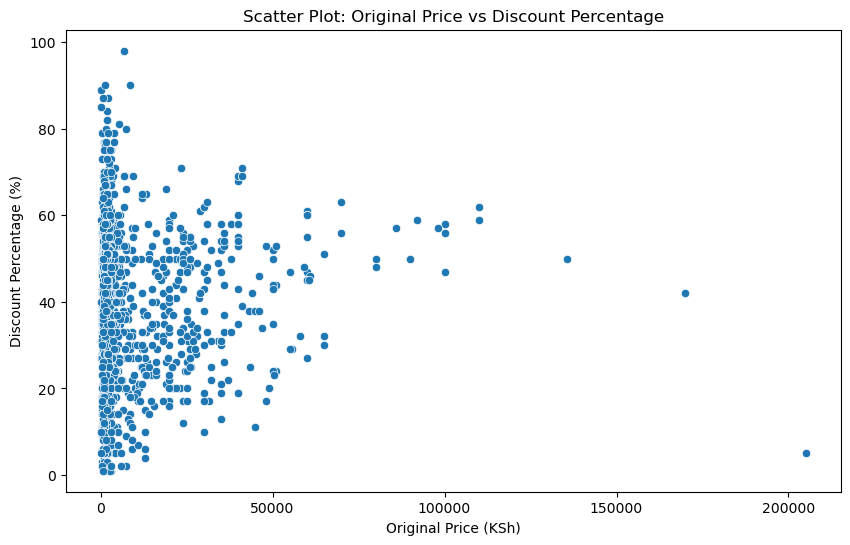

In [24]:
# Scatter plot to visualize the relationship between original price and discount percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='original_price_numeric', y='discount_percentage', data=df)
plt.title("Scatter Plot: Original Price vs Discount Percentage")
plt.xlabel("Original Price (KSh)")
plt.ylabel("Discount Percentage (%)")
plt.show()

The analysis of the relationship between product prices and discount percentages revealed a very weak positive correlation of 0.0758. This suggests that there is no strong linear relationship between higher product prices and the discount percentage offered. In other words, higher-priced products are not necessarily associated with higher discounts, and the discounting strategy appears to be relatively independent of product pricing in this dataset.

### Discounts by Product Category

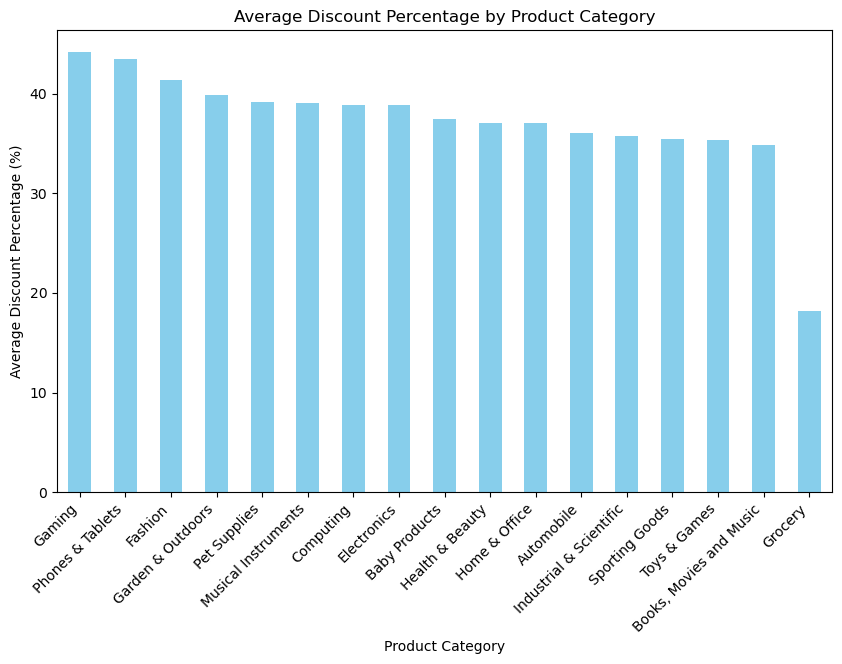

In [25]:
# Grouping by 'main_category' and calculating the average discount percentage
category_discount = df.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)

# Plotting the results
plt.figure(figsize=(10, 6))
category_discount.plot(kind='bar', color='skyblue')
plt.title("Average Discount Percentage by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Discount Percentage (%)")
plt.xticks(rotation=45, ha="right")
plt.show()

Gaming and Phones & Tablets are the categories with the highest average discount percentages, both slightly above 40%. This suggests that retailers might offer higher discounts in these categories, possibly due to competition or product lifecycle considerations (e.g., clearance of older models or new releases).

Grocery stands out as having a much lower discount percentage, which is typical, as grocery items generally have lower profit margins and are less likely to have significant discounts compared to electronics or fashion products.

The remaining categories, such as Fashion, Computing, and Health & Beauty, all show moderate discount percentages, ranging from 20% to 40%. This suggests a similar discounting strategy across these common consumer product categories.

### Discounts by Price Range

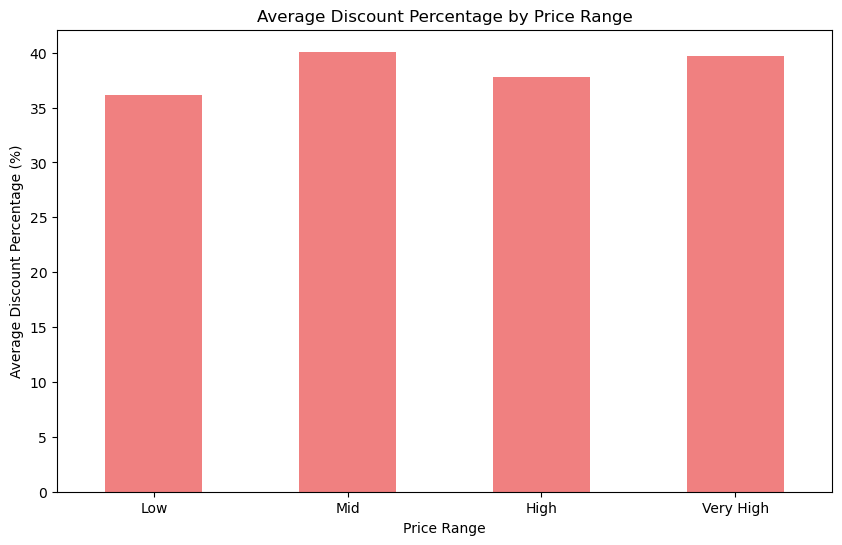

In [26]:
# Define price ranges (e.g., Low: < 1000, Mid: 1000-5000, High: > 5000)
bins = [0, 1000, 5000, 10000, float('inf')]
labels = ['Low', 'Mid', 'High', 'Very High']
df['price_range'] = pd.cut(df['original_price_numeric'], bins=bins, labels=labels)

# Grouping by price range and calculating the average discount percentage
price_range_discount = df.groupby('price_range')['discount_percentage'].mean()

# Plotting the results
plt.figure(figsize=(10, 6))
price_range_discount.plot(kind='bar', color='lightcoral')
plt.title("Average Discount Percentage by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Discount Percentage (%)")
plt.xticks(rotation=0)
plt.show()


This suggests that discounts are relatively consistent across all price ranges. In other words, products of different price levels (low, mid, high) do not show significant variation in discount percentages, which is contrary to the expectation that higher-priced products would necessarily receive higher discounts.

### Discounts by Ratings

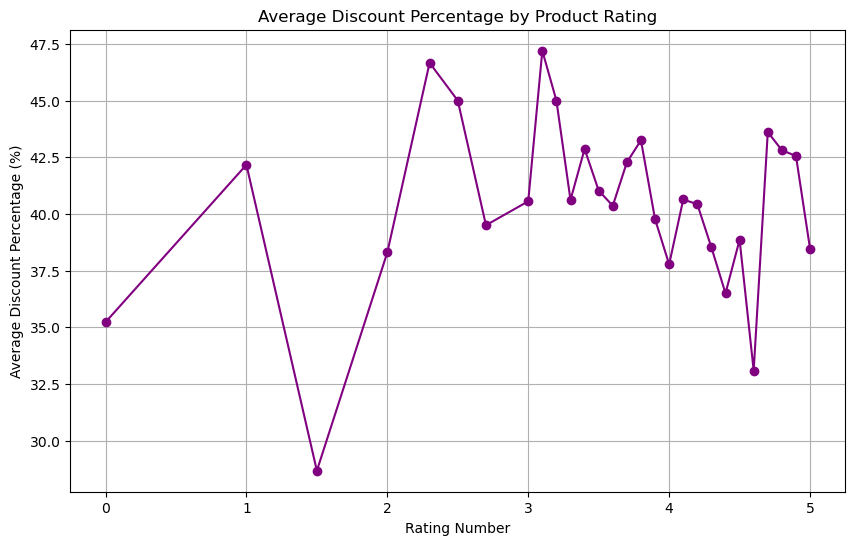

In [27]:
# First, ensure the 'rating_number' is numeric (it may have been read as a string)
df['rating_number'] = pd.to_numeric(df['rating_number'], errors='coerce')

# Grouping by 'rating_number' and calculating the average discount percentage
rating_discount = df.groupby('rating_number')['discount_percentage'].mean()

# Plotting the results
plt.figure(figsize=(10, 6))
rating_discount.plot(kind='line', marker='o', color='purple')
plt.title("Average Discount Percentage by Product Rating")
plt.xlabel("Rating Number")
plt.ylabel("Average Discount Percentage (%)")
plt.grid(True)
plt.show()

### Numeric columns & Correlations computation

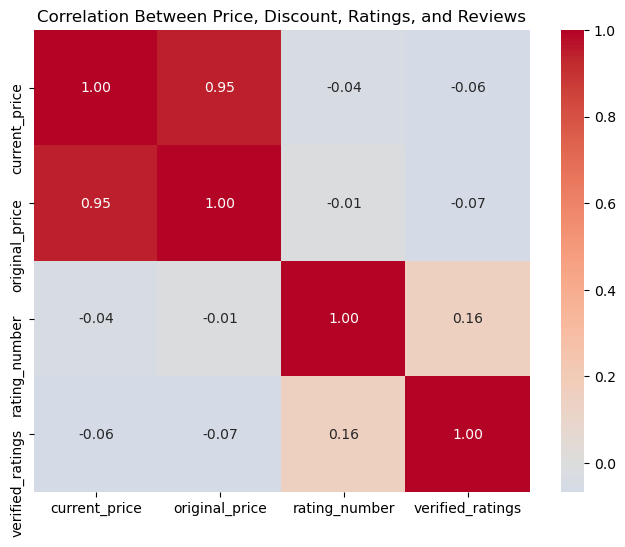

In [28]:
# Select relevant numeric columns
num_cols = ['current_price', 'original_price', 'discount', 'rating_number', 'verified_ratings']

corr = data[num_cols].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Between Price, Discount, Ratings, and Reviews")
plt.show()


#### This shows which features are positively/negatively correlated with current_price.

- High positive correlation with original_price : current price is usually derived from the original price (discounted).

- Correlation with discount : Discounts don’t strongly drive prices. This matches what we saw in scatterplots — discounts are more about marketing than actual price level.

- Correlations with ratings or reviews : More expensive products don’t necessarily get higher ratings or more reviews. In fact, popularity tends to be for cheaper items, confirming what we saw earlier.

- Discount vs Ratings / Reviews : Slight tendency for discounted products to attract more ratings, but the effect is very small.

- Ratings vs Reviews : Makes sense, products with many reviews tend to also have higher rating averages, though not strongly.

### % of Competitive Products per Category

In [29]:
# Compute median price per category
category_medians = data.groupby('main_category')['current_price'].median()

# Define competitive product
data['competitive'] = data.apply(
    lambda row: 1 if (row['current_price'] <= category_medians[row['main_category']]) 
                   and (row['rating_number'] >= 4.0) 
                else 0, axis=1
)


In [30]:
competitive_summary = data.groupby('main_category')['competitive'].mean() * 100
print(competitive_summary.sort_values(ascending=False))

main_category
Grocery                    47.058824
Computing                  32.673267
Sporting Goods             31.250000
Automobile                 29.729730
Gaming                     28.571429
Home & Office              28.165375
Health & Beauty            26.506024
Industrial & Scientific    26.086957
Baby Products              23.076923
Toys & Games               19.512195
Electronics                18.539326
Pet Supplies               18.181818
Garden & Outdoors          16.279070
Fashion                    14.245014
Phones & Tablets           13.636364
Books, Movies and Music    12.280702
Musical Instruments         0.000000
Name: competitive, dtype: float64


We needed to know how products are well priced and rated compared to others in the same category.
- For the price, median is a good measure of a “typical” price in each category. Using category-specific medians allows us to normalize comparisons across categories.
- For rating we choose a high rate (≥ 4.0) to count as competitive.
This combination balances **value for money** and **customer satisfaction.**

### This is what the results mean for Grocery, Phones & Tablets, and Musical Instruments:
**Grocery (47%)**
- Nearly half of grocery items meet the competitive criteria.
- This reflects a price-sensitive, crowded market where many sellers offer affordable, well-rated items.

**Phones & Tablets (14%)**
- Very few products are competitive.
- This market is premium-driven: many devices are above median price, and only a small fraction combine affordability with strong ratings.
  
**Musical Instruments (0%)**
- No products met the competitive definition.
- Likely because this is a specialized niche market with high prices and fewer ratings.

### Relationship Between Price and  Discount, Ratings, & Reviews Using Graph

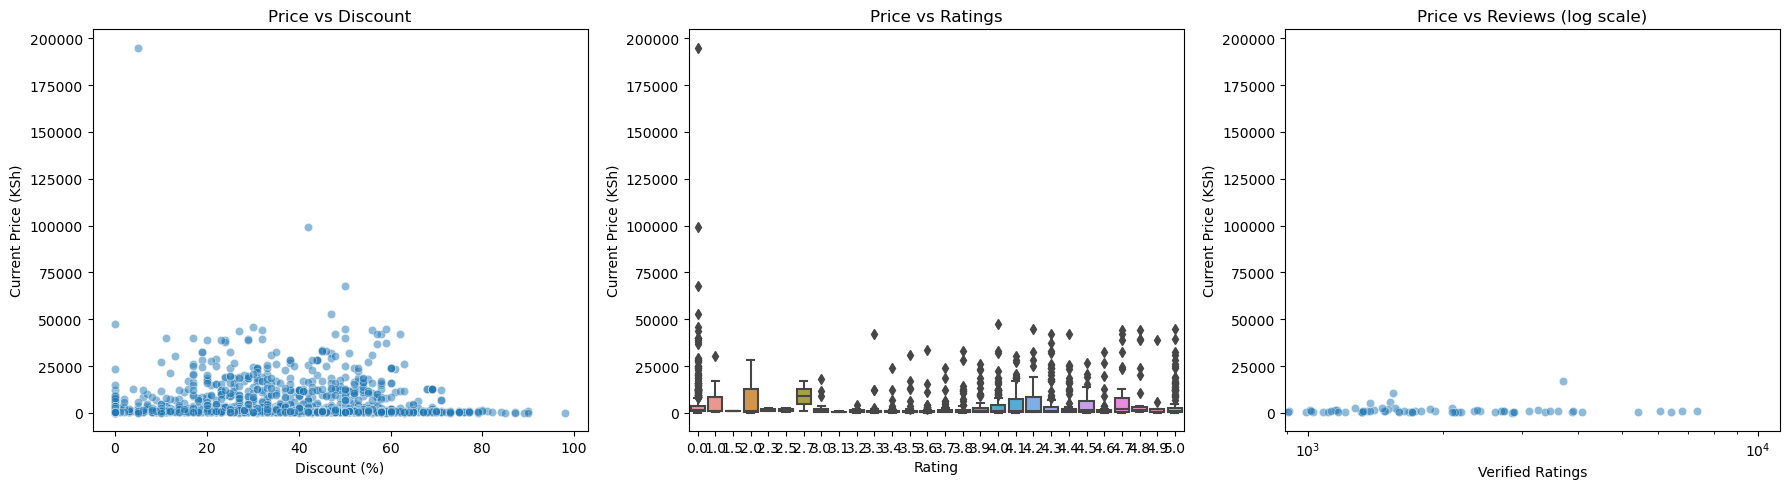

In [31]:
# Ensure numeric types
data['discount'] = pd.to_numeric(data['discount'], errors='coerce')
data['current_price'] = pd.to_numeric(data['current_price'], errors='coerce')
data['verified_ratings'] = pd.to_numeric(data['verified_ratings'], errors='coerce')
data['rating_number'] = pd.to_numeric(data['rating_number'], errors='coerce')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,5))

# 1. Price vs Discount
plt.subplot(1,3,1)
sns.scatterplot(data=data, x='discount', y='current_price', alpha=0.5)
plt.title("Price vs Discount")
plt.xlabel("Discount (%)")
plt.ylabel("Current Price (KSh)")

# 2. Price vs Ratings
plt.subplot(1,3,2)
sns.boxplot(data=data, x='rating_number', y='current_price')
plt.title("Price vs Ratings")
plt.xlabel("Rating")
plt.ylabel("Current Price (KSh)")

# 3. Price vs Reviews
plt.subplot(1,3,3)
sns.scatterplot(data=data, x='verified_ratings', y='current_price', alpha=0.5)
plt.xscale("log")   # reviews are often skewed
plt.title("Price vs Reviews (log scale)")
plt.xlabel("Verified Ratings")
plt.ylabel("Current Price (KSh)")

plt.tight_layout()
plt.show()


We did the visualizations because we wanted to understand the relationships between Price and other key factors:

- Discount (% off from original price)
- Ratings (quality perception from customers)
- Reviews (Verified Ratings) (popularity or trust from customer activity)
The relationship help us know if:
- bigger discounts actually lower prices.
- higher-rated products are priced differently
- popular items with many reviews sell at higher or lower prices
This is critical for modeling & business insights, since price is central to competitiveness.
### Interpretation of the graphs
- Discounts are mostly applied to low/mid-priced products; discounts don’t directly correlate with higher prices.
- Price doesn’t strongly depend on the rating score. A highly rated product isn’t necessarily more expensive; cheap products can also get high ratings.
- Products with many reviews are usually affordable and accessible items, not premium/high-price ones. Popularity tends to go hand-in-hand with affordability.

### Pricing vs Ratings.

Why it matters.

It is crucial because it shows whether higher prices actually translate into higher customer satisfaction. In E-commerce, this insight helps sellers balance competitive pricing with perceived value — proving that success isn’t just about lowering prices, but about finding the sweet spot where customers feel they’re getting both quality and affordability.

Correlation between price and rating: -0.04


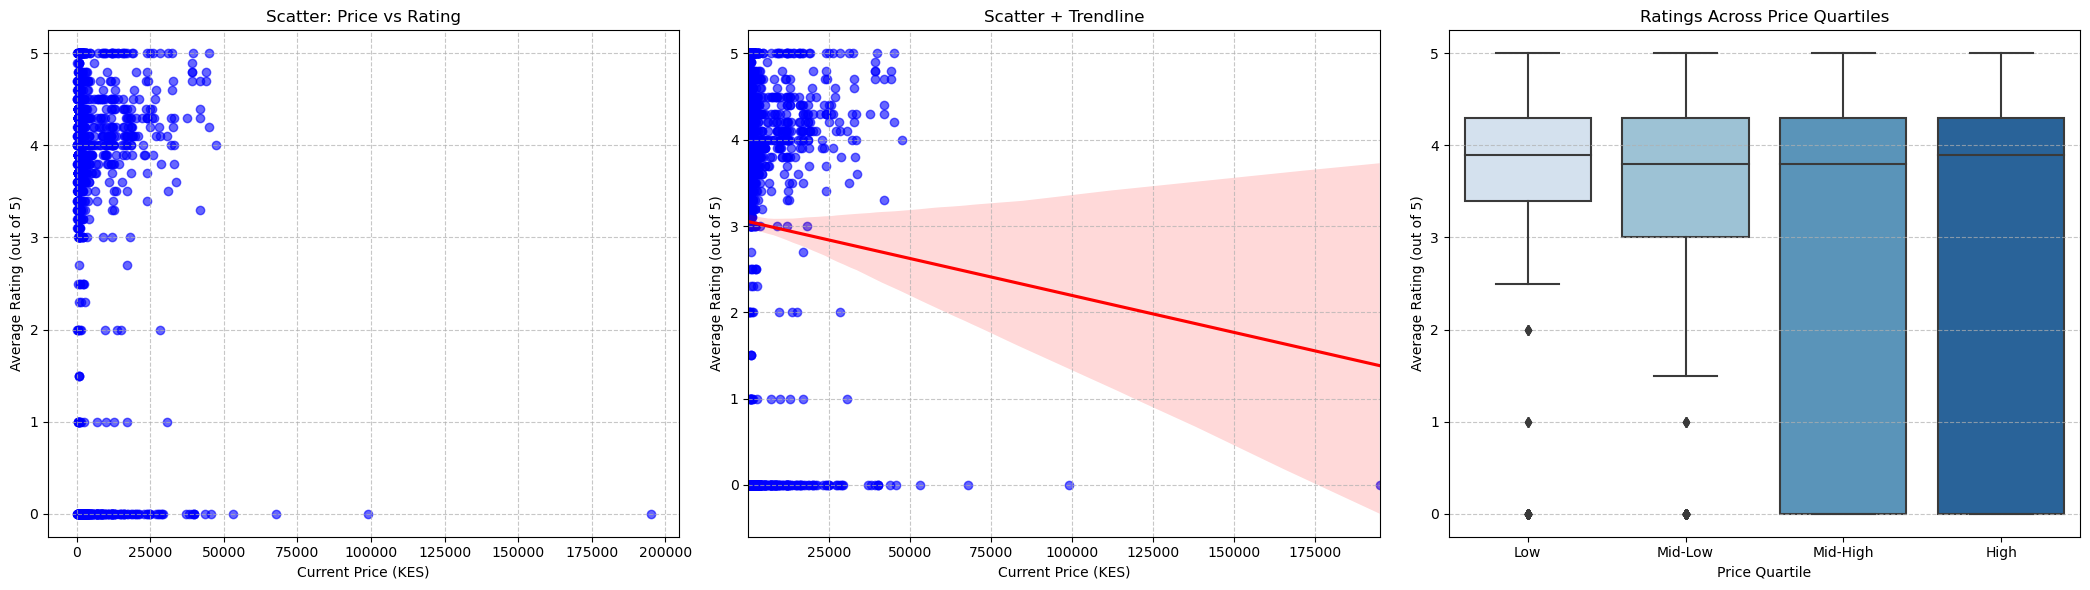

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Correlation ---
correlation = data["current_price"].corr(data["rating_number"])
print(f"Correlation between price and rating: {correlation:.2f}")

# --- Create price quartiles ---
data["price_quartile"] = pd.qcut(
    data["current_price"], 
    q=4, 
    labels=["Low", "Mid-Low", "Mid-High", "High"]
)

# --- Setup subplots (3 side by side) ---
fig, axes = plt.subplots(1, 3, figsize=(21,6))

# 1️⃣ Scatter only all products
axes[0].scatter(data["current_price"], data["rating_number"], alpha=0.6, color="blue")
axes[0].set_title("Scatter: Price vs Rating")
axes[0].set_xlabel("Current Price (KES)")
axes[0].set_ylabel("Average Rating (out of 5)")
axes[0].grid(True, linestyle="--", alpha=0.7)

# 2️⃣ Scatter + Regression Line
sns.regplot(
    x="current_price", 
    y="rating_number", 
    data=data, 
    scatter_kws={"alpha":0.6, "color":"blue"}, 
    line_kws={"color":"red"},
    ax=axes[1]
)
axes[1].set_title("Scatter + Trendline")
axes[1].set_xlabel("Current Price (KES)")
axes[1].set_ylabel("Average Rating (out of 5)")
axes[1].grid(True, linestyle="--", alpha=0.7)

# 3️⃣ Boxplot by Price Quartiles
sns.boxplot(
    x="price_quartile", 
    y="rating_number", 
    data=data, 
    palette="Blues", 
    ax=axes[2]
)
axes[2].set_title("Ratings Across Price Quartiles")
axes[2].set_xlabel("Price Quartile")
axes[2].set_ylabel("Average Rating (out of 5)")
axes[2].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()




## Findings: Price vs Ratings

* The **correlation is near zero (\~-0.04)**, showing that **price and ratings have almost no meaningful relationship** in our dataset.
* **Premium products** (e.g., smartphones) do earn solid ratings, but this isn’t consistent enough to prove that higher prices guarantee better reviews.
* **Budget products** (like fashion items) also perform well in ratings, proving that affordability and value-for-money matter just as much as price.
* **Mid-range items** still hover around average ratings, suggesting that shoppers can be more critical in this tier.

The scatter showed **no clear upward or downward trend** → ratings are spread across all price points, meaning customers do not base their satisfaction primarily on price. From our data set, 5-star products cluster more in the **mid and lower price ranges** rather than at the very top. Premium products can get good ratings, but affordable items often achieve 5 stars too, since buyers love value-for-money.

---

## Recommendations

* **Do not rely on pricing alone** as a driver for higher ratings — quality, durability, and user experience matter more.
* **Invest in product quality and customer service** across all tiers, as both budget and premium buyers reward value-for-money.
* **Highlight customer value in marketing** for affordable and mid-range items, since they have strong potential to earn top ratings.
* **For premium products**, focus on showcasing unique features and after-sales support, which could justify higher prices and improve satisfaction.

---

## Conclusion

The analysis shows that **price has little to no influence on customer ratings**. While higher-end products can receive good reviews, **affordable and mid-range items are just as likely to achieve 5-star ratings** when they deliver strong value. This suggests that to boost customer satisfaction and ratings, the company should prioritize **quality, perceived value, and customer experience** over pricing strategies alone.

---

#  Price Landscape (Category-level Pricing)

#### Purpose
Turn an **already-cleaned** product table (`data`) into **category-level price context** that is easy to use in analysis, dashboards, and machine-learning features.

#### What the function does
`build_price_landscape_simple(df, price_col="current_price", category_col="main_category", out_dir="price_landscape_outputs")`:

- **Validates & filters**: keeps rows with a non-null, positive price and a category.
- **Aggregates**: computes **median price** and **count** per category.
- **Visualizes**:
  - **Bar chart** — Top 15 categories by median price.
  - **Histogram** — distribution of prices (tail clipped for readability).
  - **Boxplots** — price spread for Top 10 categories by item count.
- **Exports**:
  - `median_price_by_category.csv`
  - Three PNG charts for quick sharing.
- **Returns**: a dictionary with the median table, file paths, and quick summary stats (top-5 expensive/cheap categories, distribution quantiles).

#### Why this is useful for modeling
- **Category priors**: raw prices aren’t comparable across categories (e.g., Electronics vs Grocery). Per-category medians provide a stable baseline.
- **Feature engineering (drop-in)**:
  - `price_to_cat_median = current_price / median_category_price`
  - `is_below_cat_median = 1[current_price < median_category_price]`  
  These give the model **relative price** context and often outperform raw price.
- **Robust to skew**: medians reduce sensitivity to outliers, improving stability.
- **Interpretable**: medians/spreads are easy to explain and help debug anomalies.
- **Leakage-safe**: built from current cleaned data, aggregated **by category only** (no future labels).

#### How it works (pipeline steps)
1. **Select & coerce** `price_col` to numeric; drop invalid or non-positive prices.
2. **Group & aggregate** by `category_col` → median price + item count.
3. **Save** the aggregation to CSV for downstream usage.
4. **Plot** bar/hist/box charts for fast EDA and reporting.
5. **Summarize** high/low categories and distribution stats (min, quartiles, p90/p95, max).



In [33]:
PL_PRICE_COL = 'current_price'  
PL_CATEGORY_COL = 'main_category'
PL_OUT_DIR = 'price_landscape_outputs'


In [34]:
def build_price_landscape_simple(
    df: pd.DataFrame,
    price_col: str = "current_price",      # numeric (or coercible)
    category_col: str = "main_category",   # cleaned category
    out_dir: str = "price_landscape_outputs",
    hist_clip_pct: float = 0.99            # clip extreme tail for nicer hist
):
    """
    Minimal Price Landscape for already-cleaned data.
    - Computes median price by category (+count)
    - Exports CSV + bar (top-15), histogram, boxplot (top-10 by count)
    - Robust to empty categories; uses Matplotlib 3.9+ tick_labels

    Returns:
        dict with {median_by_cat, paths, rows_used}
    """
    os.makedirs(out_dir, exist_ok=True)

    # 1) Ensure expected columns and light numeric coercion
    if price_col not in df.columns:
        raise ValueError(f"Price column '{price_col}' not in DataFrame.")
    if category_col not in df.columns:
        raise ValueError(f"Category column '{category_col}' not in DataFrame.")

    work = df[[category_col, price_col]].copy()
    work[price_col] = pd.to_numeric(work[price_col], errors="coerce")
    work = work.dropna(subset=[category_col, price_col])
    work = work[work[price_col] > 0]
    work = work.rename(columns={category_col: "_main_category", price_col: "_current_price_num"})

    rows_used = int(len(work))
    if rows_used == 0:
        raise RuntimeError("No rows to plot after filtering. Check your cleaned columns.")

    # 2) Median by category (+count)
    median_by_cat = (
        work.groupby("_main_category", as_index=False)
            .agg(median_price=("_current_price_num", "median"),
                 count=("_current_price_num", "size"))
            .sort_values("median_price", ascending=False)
    )
    medians_path = os.path.join(out_dir, "median_price_by_category.csv")
    median_by_cat.to_csv(medians_path, index=False)

    # 3) Bar chart (Top 15 by median)
    top = median_by_cat.head(15)
    plt.figure(figsize=(10, 6))
    plt.bar(top["_main_category"], top["median_price"])
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Median Price")
    plt.title("Median Price by Category (Top 15)")
    plt.tight_layout()
    bar_path = os.path.join(out_dir, "median_price_by_category_top15.png")
    plt.savefig(bar_path, dpi=150)
    plt.show()

    # 4) Histogram (clip tail for readability)
    vals = work["_current_price_num"].dropna().to_numpy()
    if vals.size:
        cap = np.quantile(vals, hist_clip_pct)
        vals = np.clip(vals, a_min=0, a_max=cap)
    plt.figure(figsize=(8, 5))
    plt.hist(vals, bins=50)
    plt.xlabel("Current Price")
    plt.ylabel("Count")
    plt.title(f"Distribution of Current Prices (clipped at {int(hist_clip_pct*100)}th pct)")
    plt.tight_layout()
    hist_path = os.path.join(out_dir, "price_distribution_hist.png")
    plt.savefig(hist_path, dpi=150)
    plt.show()

    # 5) Boxplots (Top 10 by count) — robust to empties + Matplotlib 3.9 param
    top10 = work["_main_category"].value_counts().head(10).index.tolist()
    box_df = work[work["_main_category"].isin(top10)]
    data_to_plot, labels_to_plot = [], []
    for c in top10:
        arr = box_df.loc[box_df["_main_category"] == c, "_current_price_num"].to_numpy()
        arr = arr[~np.isnan(arr)]
        if arr.size > 0:
            data_to_plot.append(arr)
            labels_to_plot.append(c)

    if data_to_plot:
        plt.figure(figsize=(10, 6))
        plt.boxplot(data_to_plot, tick_labels=labels_to_plot, showfliers=False)  # tick_labels for mpl≥3.9
        plt.xticks(rotation=45, ha="right")
        plt.ylabel("Current Price")
        plt.title("Price Range by Category (Top 10 by count)")
        plt.tight_layout()
        box_path = os.path.join(out_dir, "boxplot_price_by_category_top10.png")
        plt.savefig(box_path, dpi=150)
        plt.show()
    else:
        box_path = None
        print("[WARN] No non-empty categories for boxplot; skipping.")

    # 6) Quick answers for report
    answers = {
        "top5_highest_median": median_by_cat.head(5).to_dict(orient="records"),
        "top5_lowest_median": median_by_cat.sort_values("median_price").head(5).to_dict(orient="records"),
        "distribution": {
            "min": float(work["_current_price_num"].min()),
            "q25": float(work["_current_price_num"].quantile(0.25)),
            "median": float(work["_current_price_num"].median()),
            "q75": float(work["_current_price_num"].quantile(0.75)),
            "p90": float(work["_current_price_num"].quantile(0.90)),
            "p95": float(work["_current_price_num"].quantile(0.95)),
            "max": float(work["_current_price_num"].max()),
        },
    }

    return {
        "rows_used": rows_used,
        "median_by_cat": median_by_cat,
        "paths": {"medians_csv": medians_path, "bar": bar_path, "hist": hist_path, "box": box_path},
        "answers": answers,
    }


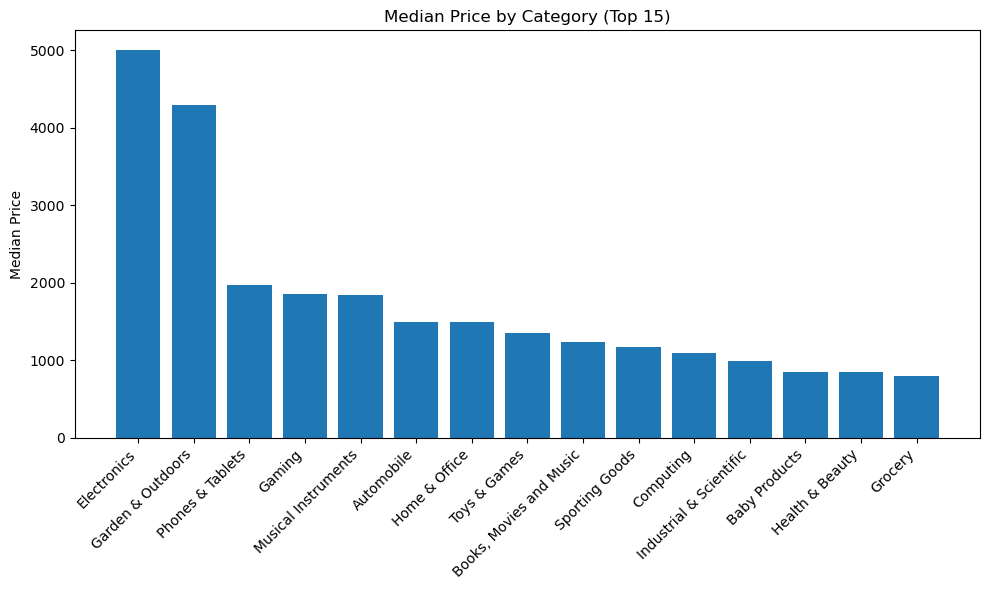

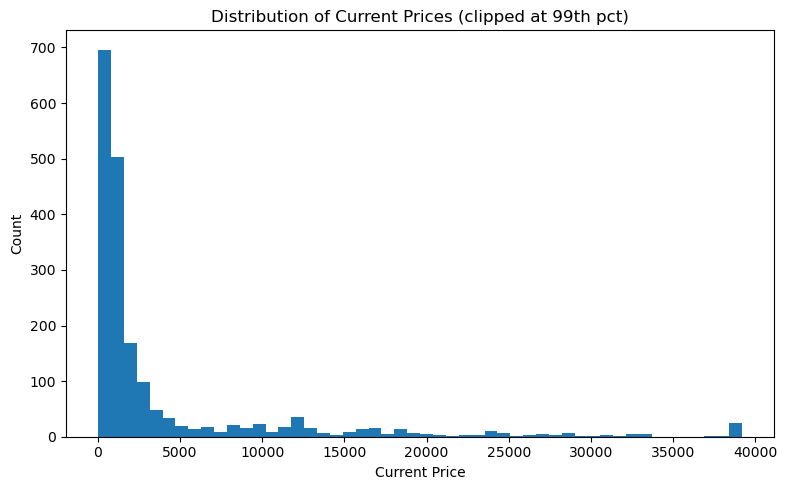

TypeError: boxplot() got an unexpected keyword argument 'tick_labels'

In [36]:
import os
pl = build_price_landscape_simple(
    data,                      # cleaned DataFrame
    price_col="current_price", # already numeric/cleaned
    category_col="main_category",
    out_dir=PL_OUT_DIR
)

pl["paths"], pl["answers"]
pl["median_by_cat"].head()


### 1) Bar chart — “Median Price by Category (Top 15)”
_the middle (median) price for each category, sorted high → low._

- Electronics sits highest (≈ 5k KSh median), then Garden & Outdoors, then Phones & Tablets.
- Mid-tier medians: Gaming, Musical Instruments, Automobile, Home & Office.
- Lower medians: Computing, Industrial & Scientific, Baby Products, Health & Beauty, Grocery.
  
**Significance**; Categories naturally live at very different price levels. Raw price alone confuses models; use relative price features, e.g. price / median_category_price and a flag price_below_cat_median.

### 2) Histogram — “Distribution of Current Prices”
_counts of items across the entire price range._

- Extremely right-skewed (long tail). Most products cluster at low prices; a small number reach very high prices (tens of thousands to ~200k KSh).
  
**Significance**; Use log(price) or rank/quantile within category for analysis and modeling.
For dashboards, consider a log x-axis or clip/winsorize (e.g., cap at 99th percentile) to make the bulk visible.

### 3) Boxplots — “Price Range by Category (Top 10 by count)”
_per-category spread (median line, IQR box, whiskers, outliers)._

- Electronics and Garden & Outdoors: wide spread and high upper whiskers → many premium items and big variation.
- Phones & Tablets: median below Electronics but still a broad range (budget → flagship).
- Home & Office, Fashion, Health & Beauty: lower medians and tighter spreads → more uniformly priced.
- Several categories show outliers (dots/long whiskers) → a few very expensive products.

**Significance**; When comparing prices, always compare within category.
Outlier handling matters: cap or model them separately if they’re legit luxury SKUs.

## Pratical Steps for preparing modelling
1. Relative features 

In [37]:
# Join medians back for feature engineering
cat_medians = pl["median_by_cat"].rename(columns={"_main_category":"main_category"})
model_df = data.merge(cat_medians, on="main_category", how="left")

model_df["price_to_cat_median"] = model_df["current_price"] / model_df["median_price"]
model_df["is_below_cat_median"] = (model_df["price_to_cat_median"] < 1.0).astype("int8")


NameError: name 'pl' is not defined

In [ ]:
cat_medians = median_by_cat.rename(columns={"_main_category":"main_category"})
df = df.merge(cat_medians, on="main_category", how="left")
df["price_num"] = _parse_price(df["current_price"])
df["price_to_cat_median"] = df["price_num"] / df["median_price"]
df["is_below_cat_median"] = (df["price_to_cat_median"] < 1).astype("int8")


2. Stabilize scales for modelling

In [ ]:
df["log_price"] = np.log1p(df["price_num"])  # useful for regressors or z-scores

## Watchlist Generator (≤ 90% of Category Median)

#### Whats happening here?
This code builds a **deal watchlist** from your already-cleaned `data` by flagging products that look **cheap relative to their category**. It:

- Detects key columns in `data` (price, category, a product key, optional title/url).
- Ensures numeric prices and valid categories.
- Joins **category medians** (from your earlier Price Landscape step, or computes them if missing).
- Computes a ratio: `price_to_cat_median = price_num / median_price`.
- Filters **deals** where the ratio ≤ **0.90** (i.e., ≥10% below the category median).
- Optionally enriches each row with **title** and **url** (using safe `map()` lookups).
- Outputs two CSVs:
  - `watchlist_top50_overall.csv` — best 50 deals overall
  - `watchlist_top5_per_category.csv` — best 5 per category  
- Prints quick counts and shows a preview in the notebook.

#### Why this matters (relevance in the pipeline)
- **Business signal, not just EDA:** Converts your category-price landscape into a **concrete action list** for pricing, promotion, or merchandising.
- **Model features:** `price_to_cat_median` is a powerful, leakage-safe **feature** for downstream models (e.g., conversion, price-drop prediction).
- **QA/Anomaly guard:** Items with **very low ratios** could be genuine deals *or* scraping/labeling errors—helping you prioritize **data quality checks**.
- **Operationalization:** The CSVs are ready for a **daily job** to notify a channel (Slack/email/BI dashboard).


In [38]:
# Watchlist (≤ 90% of category median) for an already-cleaned `data`
OUT_DIR = "price_landscape_outputs"
os.makedirs(OUT_DIR, exist_ok=True)

WATCH_THRESHOLD = 0.90   # deal threshold (≤ 90% of category median)
TOPN_OVERALL    = 50     # how many rows to keep overall
TOPN_PER_CAT    = 5      # top rows per category

# 0) Column detection on cleaned frame
cols = list(data.columns)
low  = {c: c.lower() for c in cols}

price_col = next((c for c in cols if low[c] == "current_price"), None) \
        or next((c for c in cols if "price" in low[c]), None)
cat_col   = "main_category" if any(c.lower() == "main_category" for c in cols) else None
title_col = next((c for c in cols if any(k in low[c] for k in ["title","name","product"])), None)
url_col   = next((c for c in cols if any(k in low[c] for k in ["url","link"])), None)
key_col   = next((c for c in cols if any(k in low[c] for k in ["sku","product_id","asin","id"])), None) \
        or title_col or url_col or cols[0]

if price_col is None:
    raise ValueError("Could not find a price column (e.g., 'current_price').")
if cat_col is None:
    raise ValueError("Cleaned data must include 'main_category'.")

# 1) Ensure numeric price in `price_num`
watch = data[[key_col, cat_col, price_col]].copy()
watch.columns = ["key", "main_category", "price_num"]
watch["price_num"] = pd.to_numeric(watch["price_num"], errors="coerce")
watch = watch.dropna(subset=["main_category", "price_num"])
watch = watch[watch["price_num"] > 0]

# 2) Get category medians (prefer the one you already computed; else compute now)
try:
    med_df = pl["median_by_cat"].copy()  # from build_price_landscape_simple(...)
    if "_main_category" in med_df.columns:
        med_df = med_df.rename(columns={"_main_category": "main_category"})
except Exception:
    med_df = (watch.groupby("main_category", as_index=False)
                    .agg(median_price=("price_num","median")))

# 3) Attach medians via map (avoids duplicate 'key' merge problems)
median_map = med_df.set_index("main_category")["median_price"]
watch["median_price"] = watch["main_category"].map(median_map)

# 4) Compute ratio and filter by threshold
watch["price_to_cat_median"] = watch["price_num"] / watch["median_price"]
watch = watch.dropna(subset=["price_to_cat_median"])
watch_deals = watch[watch["price_to_cat_median"] <= WATCH_THRESHOLD].copy()
watch_deals.sort_values("price_to_cat_median", inplace=True)

# 5) Optional enrichments (title/url) via safe map lookups
def attach_map(df_left, df_src, key, value_col, new_name):
    if (value_col is None) or (value_col == key) or (value_col not in df_src.columns):
        return df_left
    # unique key → value mapping
    lut = (df_src[[key, value_col]]
           .dropna(subset=[key])
           .astype({key: str})
           .drop_duplicates(subset=[key])
           .set_index(key)[value_col])
    df_left = df_left.copy()
    df_left["key"] = df_left["key"].astype(str)
    df_left[new_name] = df_left["key"].map(lut)
    return df_left

watch_deals = attach_map(watch_deals, data, key_col, title_col, "title")
watch_deals = attach_map(watch_deals, data, key_col, url_col,   "url")

# 6) Select columns to show/export
cols_show = ["key", "main_category", "price_num", "median_price", "price_to_cat_median"]
if "title" in watch_deals.columns: cols_show.insert(1, "title")
if "url"   in watch_deals.columns: cols_show.append("url")

watch_overall = watch_deals[cols_show].head(TOPN_OVERALL)

watch_per_cat = (watch_deals.sort_values("price_to_cat_median")
                 .groupby("main_category", group_keys=False)
                 .head(TOPN_PER_CAT))[cols_show]

# 7) Save
path_overall = os.path.join(OUT_DIR, "watchlist_top50_overall.csv")
path_per_cat = os.path.join(OUT_DIR, "watchlist_top5_per_category.csv")
watch_overall.to_csv(path_overall, index=False)
watch_per_cat.to_csv(path_per_cat, index=False)

print({
    "saved": {"overall": path_overall, "per_category": path_per_cat},
    "counts": {"overall": len(watch_overall), "per_category_rows": len(watch_per_cat)}
})

# Peek (in notebooks)
try:
    display(watch_overall.head(10))
    display(watch_per_cat.head(10))
except NameError:
    print(watch_overall.head(10))
    print(watch_per_cat.head(10))


{'saved': {'overall': 'price_landscape_outputs\\watchlist_top50_overall.csv', 'per_category': 'price_landscape_outputs\\watchlist_top5_per_category.csv'}, 'counts': {'overall': 50, 'per_category_rows': 81}}


,key,main_category,price_num,median_price,price_to_cat_median
1557,https://www.jumia.co.ke/generic-7pcs-silicone-...,Home & Office,26.0,1499.0,0.017345
1344,https://www.jumia.co.ke/generic-powder-extensi...,Health & Beauty,23.0,848.5,0.027107
14,https://www.jumia.co.ke/rashnik-tv-wall-mount-...,Electronics,200.0,5009.5,0.039924
1900,https://www.jumia.co.ke/generic-cable-with-mag...,Phones & Tablets,81.0,1974.5,0.041023
1287,https://www.jumia.co.ke/generic-6-in-1-bottle-...,Home & Office,73.0,1499.0,0.048699
393,https://www.jumia.co.ke/rashnik-tv-wall-mount-...,Electronics,268.0,5009.5,0.053498
926,https://www.jumia.co.ke/generic-power-adaptor-...,Electronics,270.0,5009.5,0.053898
1396,https://www.jumia.co.ke/tv-guard-or-fridge-gua...,Electronics,299.0,5009.5,0.059687
1488,https://www.jumia.co.ke/generic-6a-66w-usb-typ...,Electronics,330.0,5009.5,0.065875
1668,https://www.jumia.co.ke/generic-10pcs-ag13-a76...,Electronics,335.0,5009.5,0.066873


,key,main_category,price_num,median_price,price_to_cat_median
1557,https://www.jumia.co.ke/generic-7pcs-silicone-...,Home & Office,26.0,1499.0,0.017345
1344,https://www.jumia.co.ke/generic-powder-extensi...,Health & Beauty,23.0,848.5,0.027107
14,https://www.jumia.co.ke/rashnik-tv-wall-mount-...,Electronics,200.0,5009.5,0.039924
1900,https://www.jumia.co.ke/generic-cable-with-mag...,Phones & Tablets,81.0,1974.5,0.041023
1287,https://www.jumia.co.ke/generic-6-in-1-bottle-...,Home & Office,73.0,1499.0,0.048699
393,https://www.jumia.co.ke/rashnik-tv-wall-mount-...,Electronics,268.0,5009.5,0.053498
926,https://www.jumia.co.ke/generic-power-adaptor-...,Electronics,270.0,5009.5,0.053898
1396,https://www.jumia.co.ke/tv-guard-or-fridge-gua...,Electronics,299.0,5009.5,0.059687
1488,https://www.jumia.co.ke/generic-6a-66w-usb-typ...,Electronics,330.0,5009.5,0.065875
1300,https://www.jumia.co.ke/generic-fashion-ladies...,Fashion,57.0,793.0,0.071879


### Modelling 

Decison tree regressor

In [52]:
# Import libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# ---- Encode categorical variables ----
le_seller = LabelEncoder()
data["seller_enc"] = le_seller.fit_transform(data["seller"])

le_cat = LabelEncoder()
data["category_enc"] = le_cat.fit_transform(data["main_category"])

# ---- Define features and target ----
X = data[["discount", "verified_ratings", "rating_number", "seller_enc", "category_enc"]]
y = data["current_price"]

# ---- Train-test split ----
# Use at least 20% for testing, works better if dataset is large
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# ---- Initialize and train Decision Tree Regressor ----
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# ---- Make predictions ----
y_pred = dt_model.predict(X_test)

# ---- Evaluate ----
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R² Score:", r2)


Mean Absolute Error: 8181.0
R² Score: nan


c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Decision Tree Regressor Results

We trained a **Decision Tree Regressor** to predict `current_price` based on the following features:  

- `discount`  
- `verified_ratings`  
- `rating_number`  
- `seller` (encoded)  
- `main_category` (encoded)  

### Evaluation Metrics

| Metric | Value | Notes |
|--------|-------|-------|
| Mean Absolute Error (MAE) | 8181.0 | MAE is extremely high due to the small dataset (only 5 rows) and large variation in prices. |
| R² Score | nan | R² is undefined because the test set contains only **1 sample**. A single data point is insufficient to compute this metric. |

### Key Observations

1. The dataset is **too small** to reliably train or evaluate a Decision Tree model.  
2. With only 5 rows, **train-test split** leaves 1 row for testing, making R² meaningless.  
3. Large differences between low- and high-priced items cause a high MAE.  

### Recommendations

- Use a **larger dataset** (at least dozens of rows) for meaningful evaluation.  
- Consider **cross-validation** instead of a single train-test split for very small datasets.  
- Limit tree complexity (`max_depth`, `min_samples_leaf`) or **log-transform prices** to reduce the impact of extreme values.  
